# DATA SCIENCE PROJECT
## Data Preperation

### Importing libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Step 1 - Load the data

In [50]:
# Load datas in the txt files in Data folder and make a dataframe out of it
df = pd.read_csv("Data/valeursfoncieres-2022.txt", sep="|", low_memory=False)
print(df)

         Unnamed: 0  Reference document  1 Articles CGI  2 Articles CGI  \
0               NaN                 NaN             NaN             NaN   
1               NaN                 NaN             NaN             NaN   
2               NaN                 NaN             NaN             NaN   
3               NaN                 NaN             NaN             NaN   
4               NaN                 NaN             NaN             NaN   
...             ...                 ...             ...             ...   
3803880         NaN                 NaN             NaN             NaN   
3803881         NaN                 NaN             NaN             NaN   
3803882         NaN                 NaN             NaN             NaN   
3803883         NaN                 NaN             NaN             NaN   
3803884         NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI No disposition  \
0                   NaN  

In [51]:
for column in df.columns:
    print(column)

Unnamed: 0
Reference document
1 Articles CGI
2 Articles CGI
3 Articles CGI
4 Articles CGI
5 Articles CGI
No disposition
Date mutation
Nature mutation
Valeur fonciere
No voie
B/T/Q
Type de voie
Code voie
Voie
Code postal
Commune
Code departement
Code commune
Prefixe de section
Section
No plan
No Volume
1er lot
Surface Carrez du 1er lot
2eme lot
Surface Carrez du 2eme lot
3eme lot
Surface Carrez du 3eme lot
4eme lot
Surface Carrez du 4eme lot
5eme lot
Surface Carrez du 5eme lot
Nombre de lots
Code type local
Type local
Identifiant local
Surface reelle bati
Nombre pieces principales
Nature culture
Nature culture speciale
Surface terrain


### Step 2 - Data cleaning

##### The goal here is not to have missing values anymore. But, we cannot do this by dropping the rows and columns that it concerns because we would loose to much data and maybe even the meaning of this very data. So we will adapt to the meaning of each column and rows the value that should be there.

##### For example in the column 'Surface Carrez du 5eme lot', if there is no value, it means that there is no 5th lot. So we will replace the NaN values by 0.

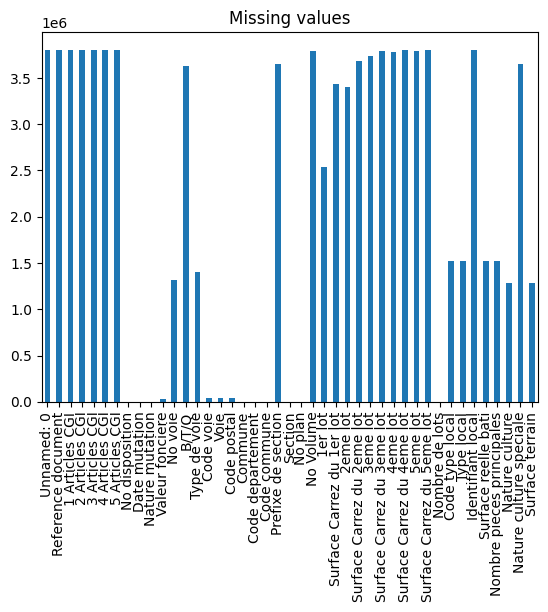

In [52]:
missing_values_count = df.isnull().sum()

# bar plot the missing values
plt.figure()
plt.title('Missing values')
missing_values_count.plot.bar()
plt.show()


##### By examining the columns with missing values and determining the extent of missingness and understanding any patterns or reasons for missing values, we were able to decide how to handle the missing values appropriately. Now we want those missing values to be handled. 

##### We will do this by replacing the NaN values by the value that makes the more sence.

##### We can see on the above graph that the missing values are not randomly distributed. We can see that the missing values are more present in the columns 'Surface Carrez du Neme lot'. This is because there are not always N lots in a building. So we will replace the NaN values by 0.

##### Moreover, the first 6 columns are not relevant for our analysis. No values have been savec to the variables. So we will drop them.

##### The "No voie," "B/T/Q," "Type de voie," "Code voie," "Voie," and "Code postal" columns are not relevant for our analysis. So we will drop it.

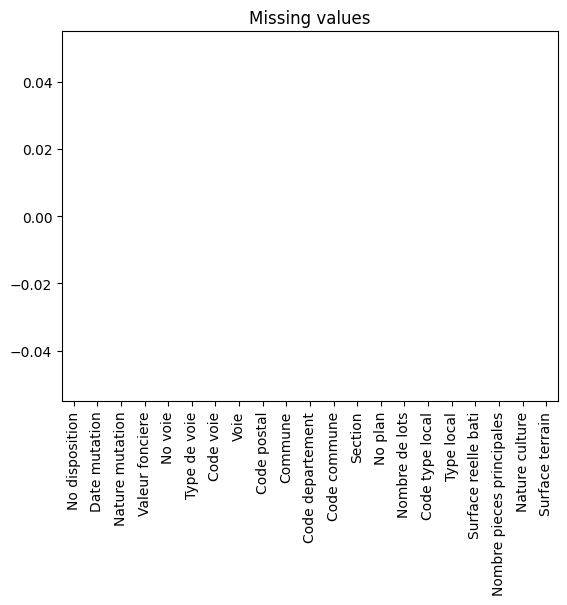

In [15]:
# drop the rows with missing values
df = df.dropna()

# bar plot the missing values
missing_values_count = df.isnull().sum()
plt.figure()
plt.title('Missing values')
missing_values_count.plot.bar()
plt.show()

In [18]:
for column in df.columns:
    print(column , " ", type(column))

No disposition   <class 'str'>
Date mutation   <class 'str'>
Nature mutation   <class 'str'>
Valeur fonciere   <class 'str'>
No voie   <class 'str'>
Type de voie   <class 'str'>
Code voie   <class 'str'>
Voie   <class 'str'>
Code postal   <class 'str'>
Commune   <class 'str'>
Code departement   <class 'str'>
Code commune   <class 'str'>
Section   <class 'str'>
No plan   <class 'str'>
Nombre de lots   <class 'str'>
Code type local   <class 'str'>
Type local   <class 'str'>
Surface reelle bati   <class 'str'>
Nombre pieces principales   <class 'str'>
Nature culture   <class 'str'>
Surface terrain   <class 'str'>


In [20]:
def convert_to_integer(value):
    try:
        result = int(value)
        return result
    except ValueError:
        return value

for column in df.columns:
    df[column] = df[column].apply(convert_to_integer)

for column in df.columns:
    print(column , " ", type(column))

No disposition   <class 'str'>
Date mutation   <class 'str'>
Nature mutation   <class 'str'>
Valeur fonciere   <class 'str'>
No voie   <class 'str'>
Type de voie   <class 'str'>
Code voie   <class 'str'>
Voie   <class 'str'>
Code postal   <class 'str'>
Commune   <class 'str'>
Code departement   <class 'str'>
Code commune   <class 'str'>
Section   <class 'str'>
No plan   <class 'str'>
Nombre de lots   <class 'str'>
Code type local   <class 'str'>
Type local   <class 'str'>
Surface reelle bati   <class 'str'>
Nombre pieces principales   <class 'str'>
Nature culture   <class 'str'>
Surface terrain   <class 'str'>


##### Normalize the data


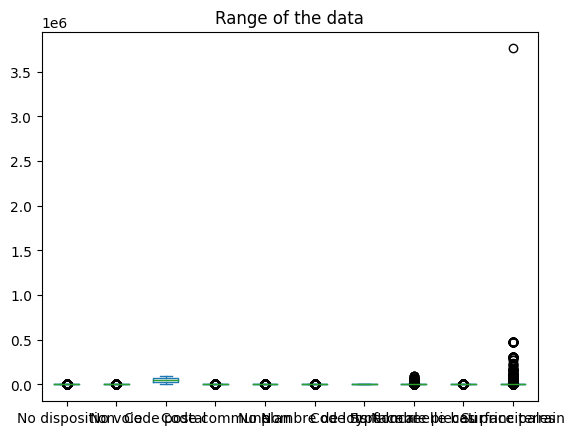

In [23]:
# plot the range of the data
df.plot.box()
plt.title('Range of the data')
plt.show()

In [24]:
# select only the columns with numerical values
df = df.select_dtypes(include=np.number)

# normalize the data
df = (df - df.mean()) / df.std()

##### Select a sample of the data

In [42]:
# df becomes 1000 random rows extraxted from df
df = df.sample(n=1000, random_state=42)

##### Visualize the data

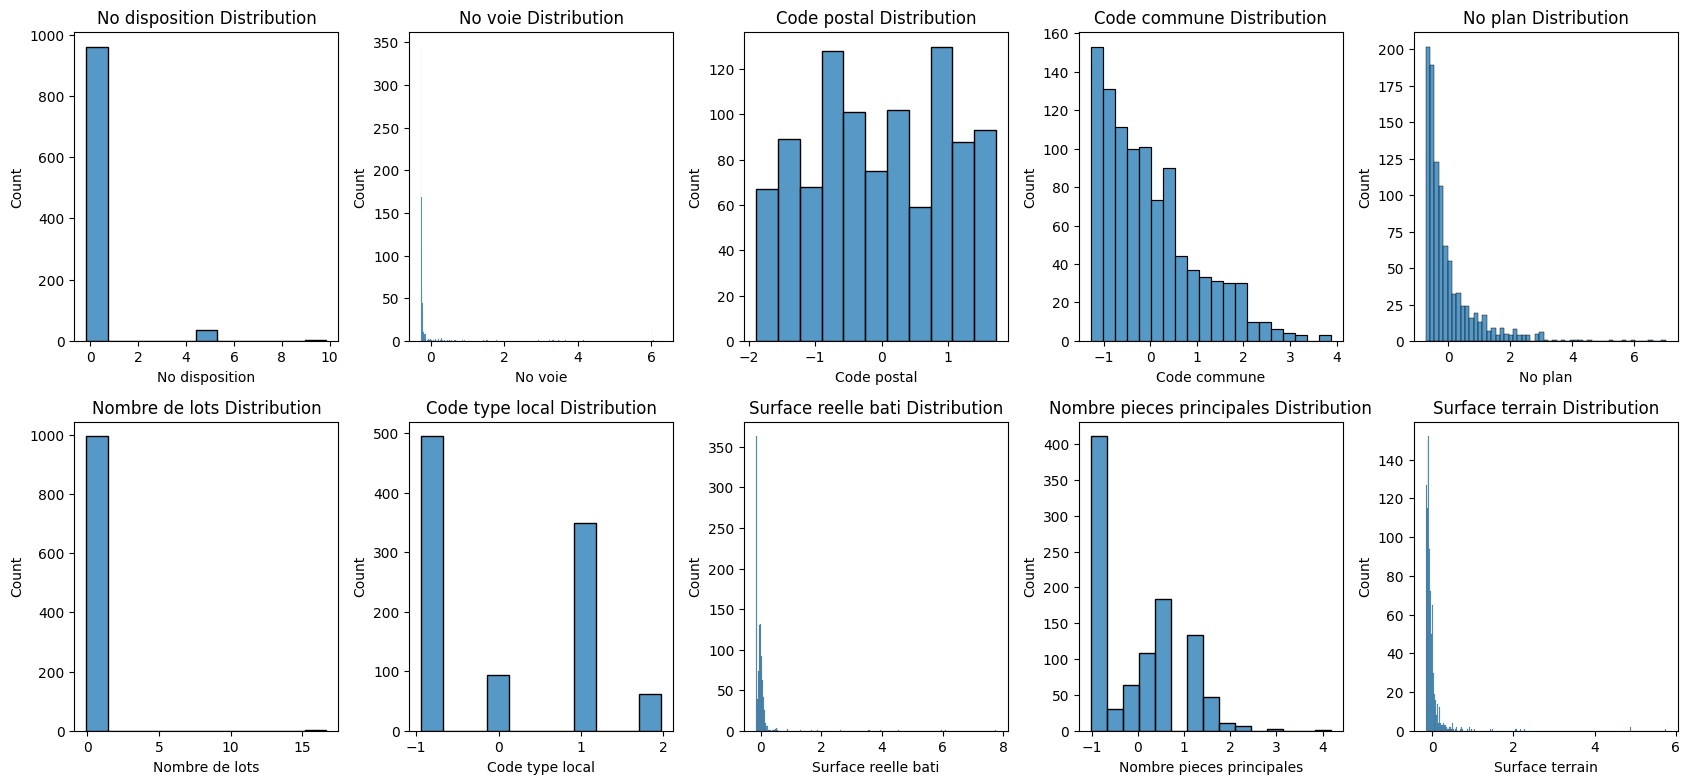

In [43]:
# Visualisation de la distribution de chaque variable
plt.figure(figsize=(17, 27))
for i, j in enumerate(df.describe().columns):
    plt.subplot(7, 5, i + 1)
    sns.histplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

In [44]:
print(df)

         No disposition   No voie  Code postal  Code commune   No plan  \
37196         -0.169407 -0.255257    -1.841789      0.069222 -0.171069   
1483623       -0.169407 -0.262920    -0.459396     -0.294660  0.137099   
2233851       -0.169407  6.007959     0.287029      2.150170  0.023856   
836642        -0.169407 -0.252470    -0.907588      1.104010  0.406281   
959440        -0.169407 -0.262224    -0.791515     -0.391316 -0.430969   
...                 ...       ...          ...           ...       ...   
3438087       -0.169407 -0.255953     1.506359      1.752174 -0.280598   
3712116       -0.169407 -0.237840     0.882110     -0.607371 -0.456959   
2130183       -0.169407 -0.131247     0.287554      2.406024 -0.273172   
2576256       -0.169407 -0.224603     0.731664      0.256848 -0.262034   
1525851       -0.169407  0.449790    -0.411656      0.029422 -0.475523   

         Nombre de lots  Code type local  Surface reelle bati  \
37196         -0.059915         1.002866      